# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


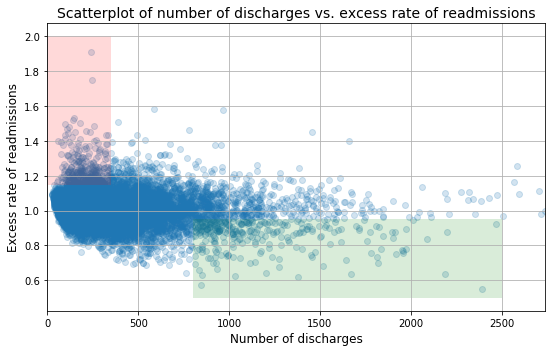

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

No, I do not agree with the above analysis and recommendations.  There is very little actual statistical analysis behind the recommendations.  Instead, there is evidence of some preliminary data visualization (in the form of one scatterplot), and a couple of basic counts about the data.  There is no hypothesis being tested and there are no probabilistic methods around the claims being made.  Rather, the above serves more as preliminary EDA that should be followed with a more in-depth statistical analysis.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
   **1. Setup an appropriate hypothesis test.**  
   In this case, we are testing the population proportion of excess readmission ratios > 1 in low-discharge hospitals vs the population proportion of excess readmission ratios > 1 in high-discharge hospitals.  So our alternative hypothesis is that the proportion of low-discharge hospitals (Pa) with excess readmission ratios > 1 is less than the population proportion of high-discharge hospitals (Pb) with excess readmission ratios > 1.  Therefore:  
   Ho: Pa - Pb = 0  
   H1: Pa - Pb > 0  
   **2. Compute and report the observed significance value (or p-value).**  
   Per the below, our p-value = .0000000014.  
   **3. Report statistical significance for $\alpha$ = .01.**  
   A p-value of .0000000014. is considered statistically significant at < .01.  
   **4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**
   In this case, the statistical significance and practical significance do not vary all that much here.  Aside from the statistical significance of our p-value, we also have a z-score that is way higher than the limit of our confidence interval at 2.326.  From a practical perspective, this is a difference worth noting.  
   **5. Look at the scatterplot above.**  
      **- What are the advantages and disadvantages of using this plot to convey information?**  
      This plot is advantageous in that it gives a very quick look into the variables that we are trying to assess.  However, it has its disadvantages.  For one, the axis labels are not particularly enlightening and border on confusing.  For example, the x-axis is labeled "number of discharges" when it really should be labeled "hospitals by discharge number."  Similarly, the plot should be titled "Hospitals by number of discharges vs excess readmission ratio" since we are measuring hospitals (not single discharges).  Also, our labels should stay consistent--we shouldn't relabel excess readmissions *ratios* as excess readmissions *rates* when they are two completely different but connected variables.  The color shading is also a bit misleading--if our analysis is discussing correlations between two variables, we should be showing the linear component of this correlation rather than just highlighting certain areas.  
      **- Construct another plot that conveys the same information in a more direct manner.**  
      See below for two options: an improved scatter plot (with fitted regression line) as well as a bee swarm plot.

In [5]:
from scipy import stats

# z-score for diff in population proportions
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
b = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>100]
Pa = np.sum(a['Excess Readmission Ratio'] > 1)/len(a)
Pb = np.sum(b['Excess Readmission Ratio'] > 1)/len(b)
Pc = (np.sum(a['Excess Readmission Ratio'] > 1)+np.sum(b['Excess Readmission Ratio'] > 1))/(len(a)+len(b))
varPa = (Pc*(1-Pc))/len(a)
varPb = (Pc*(1-Pc))/len(b)
sdPaPb = np.sqrt(varPa+varPb)
z = (Pa-Pb)/sdPaPb
print("Pa =",Pa)
print("Pb =",Pb)
print("z =",z)

# A 99% confidence interval & α  = .01; 99% confidence means 2.326 sds from the mean.
p = (1-stats.norm.cdf(z)) #one tailed test
print("p =",p)
print("")
print("Given a 99% confidence interval, p is less than our significance level (alpha) of .01.")
print("Therefore, our p-value of",p,"is considered statistically significant enough to reject the null hypothesis.")

Pa = 0.5918045705279747
Pb = 0.5035039906560249
z = 5.937265284814483
p = 1.449077635662377e-09

Given a 99% confidence interval, p is less than our significance level (alpha) of .01.
Therefore, our p-value of 1.449077635662377e-09 is considered statistically significant enough to reject the null hypothesis.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


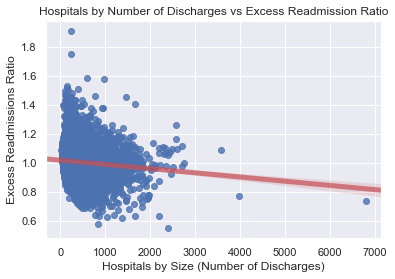

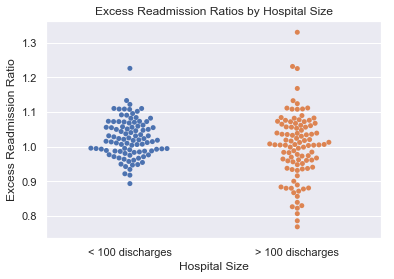

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# improved scatter plot
sns.set()
sns.regplot(x=clean_hospital_read_df['Number of Discharges'],y=clean_hospital_read_df['Excess Readmission Ratio'],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Hospitals by Size (Number of Discharges)')
plt.ylabel('Excess Readmissions Ratio')
plt.title('Hospitals by Number of Discharges vs Excess Readmission Ratio')
plt.show()

df1 = np.random.choice(a['Excess Readmission Ratio'],100)
df2 = np.random.choice(b['Excess Readmission Ratio'],100)
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df1['Hospital size'] = "< 100 discharges"
df2['Hospital size'] = "> 100 discharges"
df3 = pd.concat([df1,df2])
df3.reset_index(inplace=True)
df3.columns = ['index','Excess Readmission Ratio','Hospital Size']

print("")

# bee swarm plot
sns.swarmplot
sns.swarmplot(y='Excess Readmission Ratio',x='Hospital Size',data=df3)
plt.title('Excess Readmission Ratios by Hospital Size')
plt.show()